In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from src.config import load_config
import numpy as np
from pypfopt import expected_returns,EfficientFrontier,risk_models
from pypfopt.discrete_allocation import DiscreteAllocation,get_latest_prices

class EfficientDiversification:
    def __init__(self,config):
        self.config = config


        
    def fetch_yfinance_data(self):
        """Loads in data from yfinance using config.yaml"""
        self.all_prices = yf.download(tickers=self.config['combined_tickers'],start=self.config['start_date'],end=self.config['end_date'])['Close']
        self.all_prices = self.all_prices.dropna()
        self.all_prices.drop_duplicates(inplace=True)
        return self.all_prices   
    
    def eval_returns(self):
        """
        The pct change for each asset(returns). This is not the same
        as 'Expected Returns'
        """

        returns = self.all_prices.pct_change().dropna()
        print(f'Returns: {returns}')
        return returns
    
    
    def portfolio_metrics(self):
        """
        args:
            (mu) -> Expected Returns (using pyportfolio)
            (S) -> Risk(Volatility);
            (Ef) -> Efficient Frontier;
        """


        self.mu = expected_returns.mean_historical_return(self.all_prices)
        self.S = risk_models.sample_cov(self.all_prices)
        self.ef = EfficientFrontier(self.mu,self.S)
            

        self.weights = self.ef.max_sharpe()
        self.weights = self.ef.clean_weights()


            
        expected_annual_return, annual_volatility, sharpe_ratio = self.ef.portfolio_performance(verbose=True)
        self.performance = {
            "Expected Annual Return":expected_annual_return,
            "Annual Volatility":annual_volatility,
            "Sharpe Ratio":sharpe_ratio
        }
        return self.weights,self.performance



if __name__ == "__main__":
    config = load_config()
    ef_obj = EfficientDiversification(config)


In [4]:
data = ef_obj.fetch_yfinance_data()
data

/tmp/ipykernel_17239/2075009308.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  self.all_prices = yf.download(tickers=self.config['combined_tickers'],start=self.config['start_date'],end=self.config['end_date'])['Close']
[*********************100%***********************]  31 of 31 completed


Ticker,AAPL,ARKK,BNB-USD,BTC-USD,DIA,EFA,ETH-USD,F,GM,GOOGL,...,TSLA,USDC-USD,USDT-USD,VOO,VTI,WMT,XLF,XLK,XRP-USD,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-23,127.606911,130.657455,31.097898,23241.345703,276.833832,63.043713,583.714600,6.900063,41.038883,85.819595,...,215.326660,0.999939,0.999426,316.226929,180.402771,44.694595,26.608955,123.487900,0.258602,3690.010010
2020-12-24,128.591064,128.788971,32.500591,23735.949219,277.513550,63.069859,611.607178,6.800284,40.197807,86.114067,...,220.589996,1.000074,0.999931,317.490784,180.704529,44.781963,26.645773,124.306595,0.337819,3703.060059
2020-12-28,133.190186,125.661964,35.844559,27084.808594,279.333038,63.584095,730.397339,6.823309,40.275143,88.090424,...,221.229996,1.000101,0.998603,320.252228,181.847855,45.318737,26.774628,125.712807,0.247958,3735.360107
2020-12-29,131.416779,122.282272,38.952831,27362.437500,278.836792,63.993767,731.520142,6.769582,40.188141,87.285988,...,221.996674,0.999978,0.998590,319.578278,181.088730,45.031620,26.682585,125.115646,0.220962,3727.040039
2020-12-30,130.296204,125.016708,38.136299,28840.953125,279.452606,64.080925,751.618958,6.800284,40.449162,86.217850,...,231.593338,1.000011,1.000275,320.008881,181.576065,44.994175,26.802242,125.048256,0.211828,3732.040039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-15,236.699997,79.720001,919.970215,115444.875000,458.759308,93.610001,4526.820312,11.680000,58.950001,251.610001,...,410.040009,0.999986,1.000330,607.590027,325.890015,103.690002,53.503868,272.969208,2.997109,6615.279785
2025-09-16,238.149994,81.029999,955.712585,116843.187500,457.472961,93.349998,4503.564453,11.610000,58.459999,251.160004,...,421.619995,1.000169,1.000424,606.789978,325.450012,103.419998,53.384266,272.020416,3.038494,6606.759766
2025-09-17,238.990005,80.669998,990.309753,116468.507812,459.945923,93.000000,4592.733398,11.660000,58.730000,249.529999,...,425.859985,0.999903,1.000450,606.090027,325.160004,104.269997,53.902557,271.081604,3.084992,6600.350098


In [5]:
returns = ef_obj.eval_returns()
returns

Returns: Ticker          AAPL      ARKK   BNB-USD   BTC-USD       DIA       EFA  \
Date                                                                     
2020-12-24  0.007712 -0.014301  0.045106  0.021281  0.002455  0.000415   
2020-12-28  0.035765 -0.024280  0.102889  0.141088  0.006556  0.008153   
2020-12-29 -0.013315 -0.026895  0.086715  0.010250 -0.001777  0.006443   
2020-12-30 -0.008527  0.022362 -0.020962  0.054034  0.002209  0.001362   
2020-12-31 -0.007702 -0.020535 -0.019935  0.005574  0.005458 -0.007617   
...              ...       ...       ...       ...       ...       ...   
2025-09-15  0.011236  0.014637 -0.005471 -0.005656  0.001633  0.006667   
2025-09-16  0.006126  0.016432  0.038852  0.012112 -0.002804 -0.002778   
2025-09-17  0.003527 -0.004443  0.036200 -0.003207  0.005406 -0.003749   
2025-09-18 -0.004645  0.030867 -0.008557  0.005741  0.002970  0.003871   
2025-09-19  0.032033  0.021645  0.002331 -0.012365  0.003529 -0.003856   

Ticker       ETH-USD        

Ticker,AAPL,ARKK,BNB-USD,BTC-USD,DIA,EFA,ETH-USD,F,GM,GOOGL,...,TSLA,USDC-USD,USDT-USD,VOO,VTI,WMT,XLF,XLK,XRP-USD,^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-24,0.007712,-0.014301,0.045106,0.021281,0.002455,0.000415,0.047785,-0.014461,-0.020495,0.003431,...,0.024443,0.000135,0.000505,0.003997,0.001673,0.001955,0.001384,0.006630,0.306328,0.003537
2020-12-28,0.035765,-0.024280,0.102889,0.141088,0.006556,0.008153,0.194226,0.003386,0.001924,0.022950,...,0.002901,0.000027,-0.001328,0.008698,0.006327,0.011986,0.004836,0.011312,-0.266003,0.008723
2020-12-29,-0.013315,-0.026895,0.086715,0.010250,-0.001777,0.006443,0.001537,-0.007874,-0.002160,-0.009132,...,0.003466,-0.000123,-0.000013,-0.002104,-0.004175,-0.006336,-0.003438,-0.004750,-0.108873,-0.002227
2020-12-30,-0.008527,0.022362,-0.020962,0.054034,0.002209,0.001362,0.027475,0.004535,0.006495,-0.012237,...,0.043229,0.000033,0.001687,0.001347,0.002691,-0.000832,0.004484,-0.000539,-0.041337,0.001342
2020-12-31,-0.007702,-0.020535,-0.019935,0.005574,0.005458,-0.007617,-0.018381,-0.007901,-0.004780,0.009440,...,0.015674,-0.000204,0.000323,0.005382,0.004594,-0.000208,0.012363,0.001463,0.037851,0.006439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-15,0.011236,0.014637,-0.005471,-0.005656,0.001633,0.006667,-0.039961,0.000000,0.007692,0.044892,...,0.035611,0.000204,-0.000288,0.005211,0.004872,0.001933,-0.002230,0.009008,-0.035568,0.004707
2025-09-16,0.006126,0.016432,0.038852,0.012112,-0.002804,-0.002778,-0.005137,-0.005993,-0.008312,-0.001788,...,0.028241,0.000183,0.000094,-0.001317,-0.001350,-0.002604,-0.002235,-0.003476,0.013808,-0.001288
2025-09-17,0.003527,-0.004443,0.036200,-0.003207,0.005406,-0.003749,0.019800,0.004307,0.004619,-0.006490,...,0.010056,-0.000266,0.000026,-0.001154,-0.000891,0.008219,0.009709,-0.003451,0.015303,-0.000970


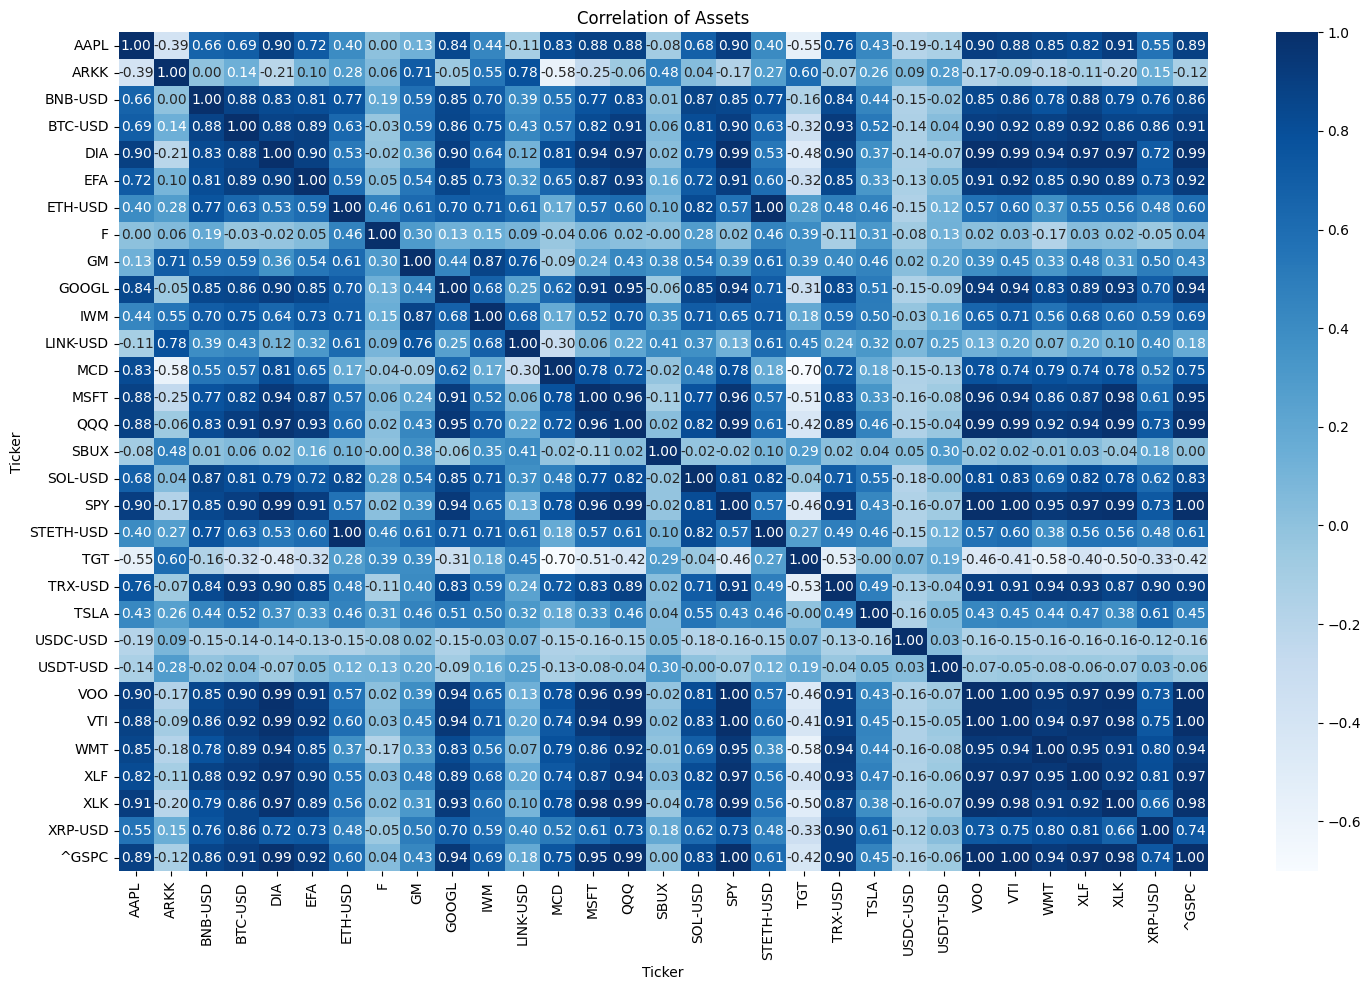

In [6]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),fmt=".2f",annot=True,cmap="Blues")
plt.title("Correlation of Assets")
plt.tight_layout()
plt.savefig("images/ef_assets_heatmap.png")
plt.show()

Value at Risk: -0.0400
Conditonal Value at Risk(CVaR): -0.0716


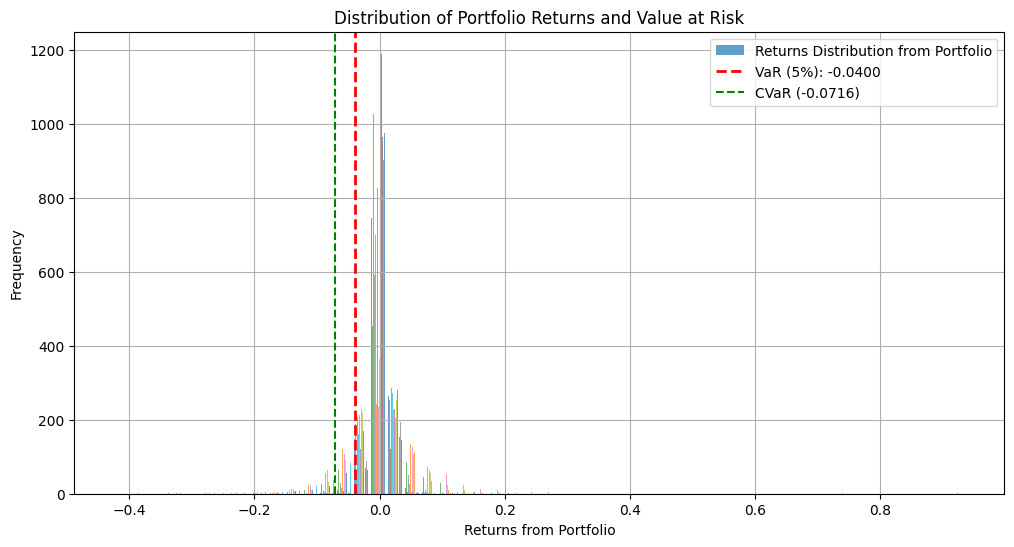

In [7]:
# VaR and Cvar for portfolio
var = np.percentile(returns,(1- 0.95)*100)
tail_risk = returns[returns < var]
cvar = np.mean(tail_risk)
print(f"Value at Risk: {var:.4f}")
print(f'Conditonal Value at Risk(CVaR): {cvar:.4f}')

plt.figure(figsize=(12,6))
plt.hist(returns,bins=50,label="Returns Distribution from Portfolio",alpha=0.7)
plt.axvline(var, color='r', linestyle='dashed', linewidth=2, label=f'VaR (5%): {var:.4f}')
plt.axvline(x=cvar, color='green', linestyle='--', label=f'CVaR ({cvar:.4f})')
plt.title('Distribution of Portfolio Returns and Value at Risk')
plt.xlabel('Returns from Portfolio')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.savefig("images/VaR-Cvar-EfficientDiversification.png")
plt.show()


In [8]:
optimal_portfolio = ef_obj.portfolio_metrics()
optimal_portfolio

Expected annual return: 13.3%
Annual volatility: 6.7%
Sharpe Ratio: 2.00


(OrderedDict([('AAPL', 0.0),
              ('ARKK', 0.0),
              ('BNB-USD', 0.01763),
              ('BTC-USD', 0.0),
              ('DIA', 0.0),
              ('EFA', 0.0),
              ('ETH-USD', 0.0),
              ('F', 0.0),
              ('GM', 0.0),
              ('GOOGL', 0.02048),
              ('IWM', 0.0),
              ('LINK-USD', 0.0),
              ('MCD', 0.04042),
              ('MSFT', 0.0),
              ('QQQ', 0.0),
              ('SBUX', 0.0),
              ('SOL-USD', 0.04001),
              ('SPY', 0.0),
              ('STETH-USD', 0.0),
              ('TGT', 0.0),
              ('TRX-USD', 0.0014),
              ('TSLA', 0.0),
              ('USDC-USD', 0.76722),
              ('USDT-USD', 0.0),
              ('VOO', 0.0),
              ('VTI', 0.0),
              ('WMT', 0.09854),
              ('XLF', 0.0143),
              ('XLK', 0.0),
              ('XRP-USD', 0.0),
              ('^GSPC', 0.0)]),
 {'Expected Annual Return': np.float64(0.13347727

In [9]:
#greedy investor and discrete allocation
weights = ef_obj.weights
latest_prices = get_latest_prices(data)
# Discrete Allocation is using the optimized weights and your Willingness to Pay to show you how much you would recieve st W* and WTP
da = DiscreteAllocation(weights, latest_prices,total_portfolio_value=1000000)
print(f'Latest Prices: {latest_prices}')
allocation, leftover = da.greedy_portfolio()
print(f'Allocation to Assets if you have $1000000 USD: {allocation}')
print(f'Leftover Cash if you were to spend $1000000 USD on optimized Weights: {leftover}')

Latest Prices: Ticker
AAPL            245.500000
ARKK             84.959999
BNB-USD         984.124084
BTC-USD      115688.859375
DIA             462.940002
EFA              93.000000
ETH-USD        4470.916992
F                11.620000
GM               58.980000
GOOGL           254.720001
IWM             242.979996
LINK-USD         23.496611
MCD             302.380005
MSFT            517.929993
QQQ             598.655945
SBUX             84.559998
SOL-USD         238.552704
SPY             663.700012
STETH-USD      4464.830566
TGT              88.129997
TRX-USD           0.343948
TSLA            426.070007
USDC-USD          0.999893
USDT-USD          1.000546
VOO             611.780029
VTI             328.440002
WMT             102.330002
XLF              54.071999
XLK             278.562012
XRP-USD           2.991852
^GSPC          6664.359863
Name: 2025-09-19 00:00:00, dtype: float64
Allocation to Assets if you have $1000000 USD: {'USDC-USD': 767302, 'WMT': 963, 'MCD': 134, 'SOL-US

In [10]:
mu = ef_obj.mu
volatility = ef_obj.S
sharpe_ratio = mu - 0.005 / volatility
print(f'Expected Returns of Full Portfolio: {mu}')
print(f'volatility of full portfolio: {volatility}')
print(f'sharpe ratio of full portfolio: {sharpe_ratio}')

Expected Returns of Full Portfolio: Ticker
AAPL         0.148760
ARKK        -0.087183
BNB-USD      1.079609
BTC-USD      0.405175
DIA          0.115136
EFA          0.085887
ETH-USD      0.539568
F            0.116796
GM           0.079899
GOOGL        0.259326
IWM          0.056000
LINK-USD     0.178369
MCD          0.103152
MSFT         0.207854
QQQ          0.158129
SBUX        -0.017375
SOL-USD      2.066863
SPY          0.149360
STETH-USD    0.536377
TGT         -0.111757
TRX-USD      0.745714
TSLA         0.155623
USDC-USD    -0.000010
USDT-USD     0.000237
VOO          0.150117
VTI          0.135404
WMT          0.191917
XLF          0.162162
XLK          0.188171
XRP-USD      0.680198
^GSPC        0.133476
dtype: float64
volatility of full portfolio: Ticker         AAPL      ARKK   BNB-USD   BTC-USD       DIA       EFA  \
Ticker                                                                  
AAPL       0.080272  0.078181  0.045362  0.042232  0.027414  0.026334   
ARKK       

/tmp/ipykernel_17239/2285642073.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


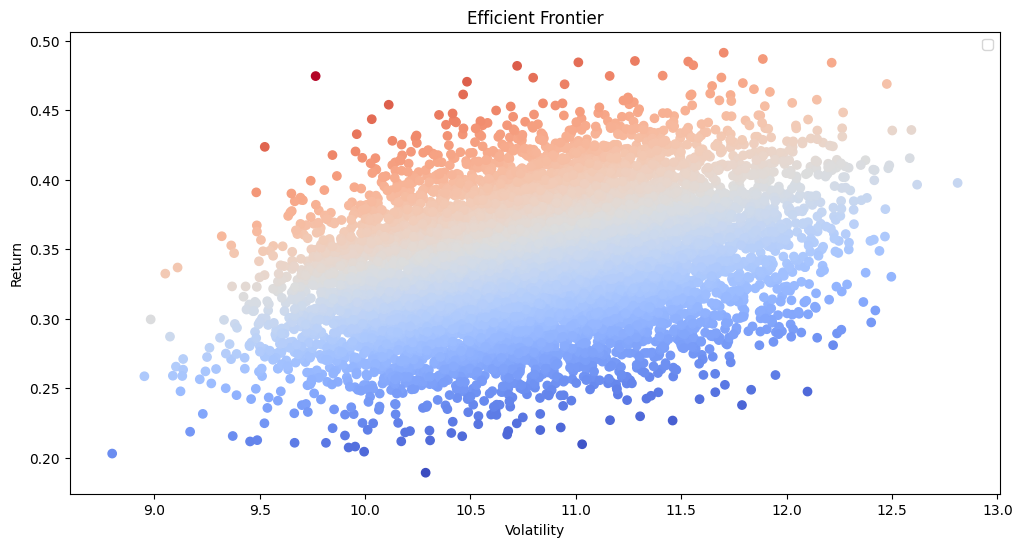

In [11]:

mean_returns = returns.mean()
num_portfolios = 10000
corr_matrix = data.corr()
results = np.zeros((3,num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(len(mean_returns))
    weights /= np.sum(weights)
  
    portfolio_return = np.sum(mean_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(corr_matrix, weights))) * np.sqrt(252)
      
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    results[2,i] = portfolio_return / portfolio_std_dev
  
results_df = pd.DataFrame(results.T,columns=['Return','Volatility','Sharpe'])

plt.figure(figsize=(12,6))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe'], cmap='coolwarm')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.legend()
plt.savefig("images/discount_ef.png")
plt.show()